# Algoritmo genético básico

START

Generate the initial population

Compute fitness

REPEAT

    Selection
    
    Crossover
    
    Mutation
    
    Compute fitness
    
UNTIL population has converged

STOP

![](https://raw.githubusercontent.com/igomezv/ComputoEvolutivo/main/img/diagram.png)

## Codificación binaria

Ejemplo: $f(x,y,z) = 2x+3y+10z-3.6$, $x = [25,36], y= [39,50], z = [91,102]$

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*GqWHvKfr8SFnA8Y-ccsnqQ.png)

## Crossover/cruza

- De un punto.
![](https://raw.githubusercontent.com/igomezv/ComputoEvolutivo/main/img/one_point.png)

- Cruza uniforme.
![](https://raw.githubusercontent.com/igomezv/ComputoEvolutivo/main/img/uniform_crossover.png)


## Mutación
- Bit flip
![](https://raw.githubusercontent.com/igomezv/ComputoEvolutivo/main/img/flipping.png)

## Mapeo fenotipo-genotipo

![](https://www.tutorialspoint.com/genetic_algorithms/images/pheno_genotype_space.jpg)
Fuente: https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_quick_guide.htm

## Ejemplos

### Codificar un cromosoma binario

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Binary encoding of the chromosome
chromosome = ['0', '1', '1', '0', '1', '0', '0', '1']

### Operador cruza

In [3]:
# Crossover operator (one point)
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1)-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

### Operador de mutacion

In [4]:
# Mutation operator (bit flip)
def mutation(chromosome, mutation_rate):
    mutated_chromosome = ""
    for gene in chromosome:
        if random.random() < mutation_rate:
            mutated_chromosome += '1' if gene == '0' else '0'
        else:
            mutated_chromosome += gene
    return mutated_chromosome

### función de aptitud

In [5]:
# Fitness function (example function that counts the number of ones in the chromosome)
def fitness(chromosome):
    return chromosome.count('1')

In [6]:
# Example usage of the operators
parent1 = ['0', '1', '1', '0', '0', '1', '0', '1']
parent2 = ['1', '0', '0', '1', '1', '0', '1', '0']

print("Antes de la cruza:")
print("Padre 1:", parent1)
print("Padre 2:", parent2)

Antes de la cruza:
Padre 1: ['0', '1', '1', '0', '0', '1', '0', '1']
Padre 2: ['1', '0', '0', '1', '1', '0', '1', '0']


In [7]:
child1, child2 = crossover(parent1, parent2)

print("Después de la cruza:")
print("Hijo 1:", child1)
print("Hijo 2:", child2)

Después de la cruza:
Hijo 1: ['0', '1', '1', '0', '0', '1', '1', '0']
Hijo 2: ['1', '0', '0', '1', '1', '0', '0', '1']


In [8]:
print("Fitness del padre 1:", fitness(parent1))
print("Fitness del padre 2:", fitness(parent2))

print("Fitness del hijo 1:", fitness(child1))
print("Fitness del hijo 2:", fitness(child2))

Fitness del padre 1: 4
Fitness del padre 2: 4
Fitness del hijo 1: 4
Fitness del hijo 2: 4


In [9]:
print("Antes de la mutación:", chromosome)

mutated_chromosome = mutation(chromosome, 0.1)

print("Después de la mutación:", mutated_chromosome)

print("Fitness del cromosoma original:", fitness(chromosome))
print("Fitness del cromosoma mutado:", fitness(mutated_chromosome))

Antes de la mutación: ['0', '1', '1', '0', '1', '0', '0', '1']
Después de la mutación: 01101100
Fitness del cromosoma original: 4
Fitness del cromosoma mutado: 4


### Operador de selección

In [10]:
# Tournament selection operator
def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: fitness(x), reverse=True)
    return tournament[0]

In [11]:
# Example usage of the operators
parent1 = ['0', '1', '1', '0', '0', '1', '0', '1']
parent2 = ['1', '0', '0', '1', '1', '0', '1', '0']

population = [parent1, parent2]

selected_parent1 = tournament_selection(population, 2)
selected_parent2 = tournament_selection(population, 2)

print("Selected parent 1:", selected_parent1)
print("Selected parent 2:", selected_parent2)

Selected parent 1: ['0', '1', '1', '0', '0', '1', '0', '1']
Selected parent 2: ['0', '1', '1', '0', '0', '1', '0', '1']


### Algoritmo genético simple

In [12]:
# Función de codificación binaria para convertir un valor decimal en una cadena binaria
def binary_encode(x, num_bits):
    print(format(x, 'b').zfill(num_bits))
    return format(x, 'b').zfill(num_bits)

# Función de decodificación binaria para convertir una cadena binaria en un valor decimal
def binary_decode(bitstring):
    return int(bitstring, 2)

# Función de inicialización de la población
def init_population(pop_size, num_bits):
    population = []
    for i in range(pop_size):
        x1 = random.randint(0, (2**num_bits)-1)
        x2 = random.randint(0, (2**num_bits)-1)
        individual = binary_encode(x1, num_bits) + binary_encode(x2, num_bits)
        population.append(individual)
    return population

# Función de selección de padres usando torneo
def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: funcion_objetivo(binary_decode(x[:num_bits]), binary_decode(x[num_bits:])))
    return tournament[0]

# Operador de cruce (crossover) de un punto
def one_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1)-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Operador de mutación de bit-flip
def bit_flip_mutation(individual, mutation_rate):
    mutated_individual = ""
    for bit in individual:
        if random.random() < mutation_rate:
            mutated_individual += '1' if bit == '0' else '0'
        else:
            mutated_individual += bit
    return mutated_individual


### Ejercicio: explorar numericamente las funciones de arriba, en particular, binary encode, binary decode, one_point_crossover y bit_flip_mutation.

In [13]:
print(binary_encode(x=2, num_bits=4))
# bit_flip_mutation(individual=ind, mutation_rate=0.2)

0010
0010


### Pregunta: ¿Dónde se lleva a cabo el mapeo fenotipo-genotipo?

## Utilizar las operaciones previas para optimizar una función.

In [14]:
# Definición de la función objetivo (función cuadrática)
def funcion_objetivo(x1, x2):
    return (x1 - 3)**2 + (x2 - 2)**2

Text(0.5, 1.0, 'Función f(x,y)')

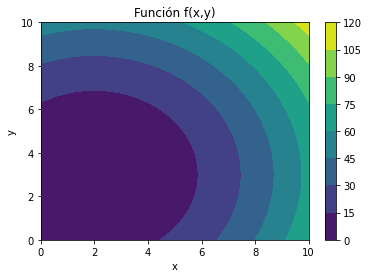

In [15]:
# Definir el rango de valores para x e y
x_range = np.linspace(0, 10, 100)
y_range = np.linspace(0, 10, 100)

# Calcular los valores de z para cada combinación de x e y
z = np.array([[funcion_objetivo(x, y) for y in y_range] for x in x_range])

# Graficar la función f
fig, ax = plt.subplots()
cmap = ax.contourf(x_range, y_range, z, cmap='viridis')
# ax.contourf(x_range, y_range, z, cmap='viridis')
fig.colorbar(cmap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Función f(x,y)')

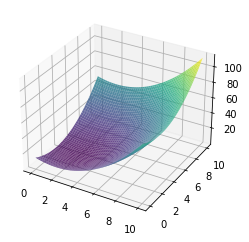

In [16]:
# Calcular los valores de z para cada combinación de x e y
z = np.array([[funcion_objetivo(x, y) for y in y_range] for x in x_range])

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función f
X, Y = np.meshgrid(x_range, y_range)
ax.plot_surface(X, Y, z, cmap='viridis', alpha=0.8)

In [17]:
# Parámetros del algoritmo genético
num_bits = 4
pop_size = 20
mutation_rate = 0.1
num_generations = 50
tournament_size = 2

# Inicialización de la población
population = init_population(pop_size, num_bits)

# Ciclo principal del algoritmo genético
for i in range(num_generations):
    # Evaluación de la aptitud de cada individuo en la población
    fitness_values = [funcion_objetivo(binary_decode(individual[:num_bits]), binary_decode(individual[num_bits:])) for individual in population]

    # Selección de padres y creación de descendencia
    offspring = []
    for j in range(pop_size // 2):
        parent1 = tournament_selection(population, tournament_size)
        parent2 = tournament_selection(population, tournament_size)
        child1, child2 = one_point_crossover(parent1, parent2)
        child1 = bit_flip_mutation(child1, mutation_rate)
        child2 = bit_flip_mutation(child2, mutation_rate)
        offspring.extend([child1, child2])

    # Evaluación de la aptitud de los descendientes
    offspring_fitness_values = [funcion_objetivo(binary_decode(individual[:num_bits]), 
                                                 binary_decode(individual[num_bits:])) for individual in offspring]

    # Selección de los individuos más aptos para la siguiente generación (reemplazo)
    combined_population = list(zip(population, fitness_values)) + list(zip(offspring, offspring_fitness_values))
    combined_population = sorted(combined_population, key=lambda x: x[1])
    population = [individual for individual, fitness in combined_population[:pop_size]]

    # Registro del mejor individuo en la generación actual
    best_fitness = min(fitness_values + offspring_fitness_values)
    best_individual = [individual for individual in population if funcion_objetivo(binary_decode(individual[:num_bits]), 
                                                                                   binary_decode(individual[num_bits:])) == best_fitness][0]
    print(f"Generación {i+1}: Mejor individuo: {best_individual} ({best_fitness})")

1000
0011
1011
0111
1111
0001
0100
0101
0011
0000
0110
1110
0101
0011
0100
0000
1111
0100
0100
0011
1110
0011
1101
1100
1111
1010
1101
1110
1100
0100
0111
1111
1101
0011
0110
1101
1001
1010
0001
0110
Generación 1: Mejor individuo: 01000011 (2)
Generación 2: Mejor individuo: 01000010 (1)
Generación 3: Mejor individuo: 01000010 (1)
Generación 4: Mejor individuo: 00110010 (0)
Generación 5: Mejor individuo: 00110010 (0)
Generación 6: Mejor individuo: 00110010 (0)
Generación 7: Mejor individuo: 00110010 (0)
Generación 8: Mejor individuo: 00110010 (0)
Generación 9: Mejor individuo: 00110010 (0)
Generación 10: Mejor individuo: 00110010 (0)
Generación 11: Mejor individuo: 00110010 (0)
Generación 12: Mejor individuo: 00110010 (0)
Generación 13: Mejor individuo: 00110010 (0)
Generación 14: Mejor individuo: 00110010 (0)
Generación 15: Mejor individuo: 00110010 (0)
Generación 16: Mejor individuo: 00110010 (0)
Generación 17: Mejor individuo: 00110010 (0)
Generación 18: Mejor individuo: 00110010 (0)

Text(1.5, 3.5, 'Mejor solución: (3.00, 2.00)')

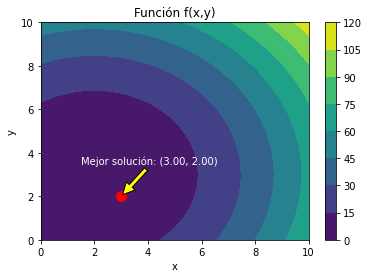

In [18]:
# Definir el rango de valores para x e y
x_range = np.linspace(0, 10, 100)
y_range = np.linspace(0, 10, 100)

# Calcular los valores de z para cada combinación de x e y
z = np.array([[funcion_objetivo(x, y) for y in y_range] for x in x_range])

# Graficar la función f
fig, ax = plt.subplots()
cmap = ax.contourf(x_range, y_range, z, cmap='viridis')
# ax.contourf(x_range, y_range, z, cmap='viridis')
fig.colorbar(cmap)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Función f(x,y)')

# Decodificar el mejor individuo encontrado
best_x = binary_decode(best_individual[:num_bits])
best_y = binary_decode(best_individual[num_bits:])

# Graficar la solución encontrada
ax.plot(best_x, best_y, 'ro', markersize=10)
ax.annotate(f'Mejor solución: ({best_x:.2f}, {best_y:.2f})', 
            (best_x, best_y), xytext=(best_x-1.5, best_y+1.5, ), 
            arrowprops=dict(facecolor='yellow', shrink=0.05), c="w")

### Práctica: Utilizar el código anterior para optimizar otra función. 

- Graficar función objetivo.
- Explicar el proceso de codificación de las soluciones.
- Mostrar mejor solución de manera gráfica.

## Problema de la mochila
![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/729px-Knapsack.svg.png)

In [41]:
import random

# Generación aleatoria de objetos de la mochila
def generate_knapsack_objects(num_objects, max_weight, max_value):
    objects = []
    for i in range(num_objects):
        weight = random.randint(1, max_weight)
        value = random.randint(1, max_value)
        objects.append((weight, value))
    return objects

# Función de codificación binaria para convertir un valor decimal en una cadena binaria
def binary_encode(x, num_bits):
    return format(x, 'b').zfill(num_bits)

# Función de decodificación binaria para convertir una cadena binaria en un valor decimal
def binary_decode(bitstring):
    return int(bitstring, 2)

# Función de evaluación de un individuo de la población
def evaluate_individual(individual, objects, capacity):
    weight = 0
    value = 0
    for i in range(len(individual)):
        if individual[i] == '1':
            weight += objects[i][0]
            value += objects[i][1]
            if weight > capacity:
                return 0
    return value

# Función de inicialización de la población
def init_population(pop_size, num_bits):
    population = []
    for i in range(pop_size):
        individual = ""
        for j in range(num_bits):
            individual += str(random.randint(0, 1))
        population.append(individual)
    return population

# Función de selección de padres usando torneo
def tournament_selection(population, objects, capacity, tournament_size):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: evaluate_individual(x, objects, capacity), reverse=True)
    return tournament[0]

# Operador de cruce (crossover) de un punto
def one_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1)-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Operador de mutación de bit-flip
def bit_flip_mutation(individual, mutation_rate):
    mutated_individual = ""
    for bit in individual:
        if random.random() < mutation_rate:
            mutated_individual += '1' if bit == '0' else '0'
        else:
            mutated_individual += bit
    return mutated_individual




In [43]:
# Función principal del algoritmo genético
def genetic_algorithm(objects, capacity, pop_size, num_generations, mutation_rate, tournament_size):
    # Inicialización de la población
    num_objects = len(objects)
    num_bits = num_objects
    population = init_population(pop_size, num_bits)
    best_individual = None
    best_fitness = -1
    
    # Evolución de la población
    for i in range(num_generations):
        # Selección de padres
        parent1 = tournament_selection(population, objects, capacity, tournament_size)
        parent2 = tournament_selection(population, objects, capacity, tournament_size)
        
        # Cruce
        child1, child2 = one_point_crossover(parent1, parent2)
        
        # Mutación
        child1 = bit_flip_mutation(child1, mutation_rate)
        child2 = bit_flip_mutation(child2, mutation_rate)
        
        # Evaluación de la descendencia
        child1_fitness = evaluate_individual(child1, objects, capacity)
        child2_fitness = evaluate_individual(child2, objects, capacity)
        
        # Reemplazo de la peor solución de la población con la mejor descendencia
        population.sort(key=lambda x: evaluate_individual(x, objects, capacity))
        if child1_fitness > child2_fitness:
            if child1_fitness > evaluate_individual(population[0], objects, capacity):
                population[0] = child1
                if child1_fitness > best_fitness:
                    best_individual = child1
                    best_fitness = child1_fitness
        else:
            if child2_fitness > evaluate_individual(population[0], objects, capacity):
                population[0] = child2
                if child2_fitness > best_fitness:
                    best_individual = child2
                    best_fitness = child2_fitness
    
    # Devolución de la mejor solución encontrada
    return (best_individual, best_fitness)


In [44]:
objects = generate_knapsack_objects(num_objects=10, max_weight=10, max_value=100)

In [45]:
capacity = 50
pop_size = 100
num_generations = 50
mutation_rate = 0.1
tournament_size = 5

best_individual, best_fitness = genetic_algorithm(objects, capacity, pop_size, num_generations, mutation_rate, tournament_size)

In [46]:
best_individual

'1111111011'